# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [22]:
import pandas as pd
import numpy as np
import sklearn

print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

2.2.3
2.1.1
1.5.2


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
# откройте данные: ваш код здесь
data = pd.read_csv('C:\скил\DST-156\IDE_NEW\MATH&ML-7. Теория вероятностей в контексте наивного байесовского классификатора/spam_or_not_spam.csv')
data.head()
#data.info()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [25]:
# рассчитайте частоты для классов : ваш код здесь
print('spam', data[data['label'] == 1]['label'].count())
print('ham', data[data['label'] == 0]['label'].count())

spam 500
ham 2500


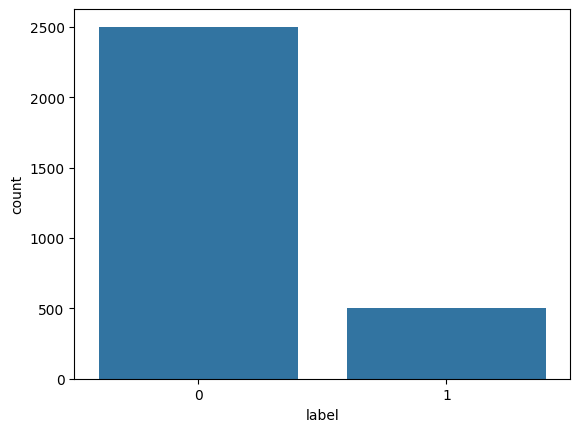

In [26]:
# визуализируйте результат: ваш код здесь
sns.countplot(data=data, x='label');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [28]:
#ваш код здесь
data = data.fillna(np.nan)
data = data.dropna()

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB
None


Переводим данные в векторный вид:

In [29]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])
X

<2999x34116 sparse matrix of type '<class 'numpy.int64'>'
	with 348376 stored elements in Compressed Sparse Row format>

Определите, сколько теперь признаков в нашем наборе данных:

In [41]:
#ваш код здесь
#X.shape
print('Количество признаков после преобразования данных в векторный вид', X.shape[1])

Количество признаков после преобразования данных в векторный вид 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [31]:
#ваш код здесь
from sklearn import model_selection
y = data['label']


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [32]:
#ваш код здесь
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.25, random_state=42) # среднее значение целевой переменной на тестовой выборке получается 0,167, а в ответе 0,165
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42) ## среднее значение целевой переменной на тестовой выборке получается 0,164, а в ответе 0,165

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [33]:
#ваш код здесь
print('Среднее значение целевой переменной по тестовой выборке', round(y_test.mean(),3))

Среднее значение целевой переменной по тестовой выборке 0.167


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [34]:
#ваш код здесь
from sklearn.naive_bayes import MultinomialNB
multinomial_nb = MultinomialNB(alpha=0.01)
multinomial_nb.fit(X_train, y_train)
y_test_pred_MultinomialNB = multinomial_nb.predict(X_test)

In [35]:
from sklearn.naive_bayes import ComplementNB
complement_nb = ComplementNB(alpha=0.01)
complement_nb.fit(X_train, y_train)
y_test_pred_ComplementNB = complement_nb.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [36]:
#ваш код здесь
from sklearn import metrics
#Метрики для метода MultinomialNB
print('Accuracy на тестовой выборке (Multinomial)', round(metrics.accuracy_score(y_test, y_test_pred_MultinomialNB), 3))
print('Precision на тестовой выборке (Multinomial)', round(metrics.precision_score(y_test, y_test_pred_MultinomialNB), 3))
print('Recall на тестовой выборке (Multinomial)', round(metrics.recall_score(y_test, y_test_pred_MultinomialNB), 3))
print('F1-score на тестовой выборке (Multinomial)', round(metrics.f1_score(y_test, y_test_pred_MultinomialNB), 3))

#Метрики для метода ComplementNB
print('Accuracy на тестовой выборке (ComplementNB)', round(metrics.accuracy_score(y_test, y_test_pred_ComplementNB), 3))
print('Precision на тестовой выборке (ComplementNB)', round(metrics.precision_score(y_test, y_test_pred_ComplementNB), 3))
print('Recall на тестовой выборке (ComplementNB)', round(metrics.recall_score(y_test, y_test_pred_ComplementNB), 3))
print('F1-score на тестовой выборке (ComplementNB)', round(metrics.f1_score(y_test, y_test_pred_ComplementNB), 3))

Accuracy на тестовой выборке (Multinomial) 0.988
Precision на тестовой выборке (Multinomial) 0.992
Recall на тестовой выборке (Multinomial) 0.936
F1-score на тестовой выборке (Multinomial) 0.963
Accuracy на тестовой выборке (ComplementNB) 0.989
Precision на тестовой выборке (ComplementNB) 0.992
Recall на тестовой выборке (ComplementNB) 0.944
F1-score на тестовой выборке (ComplementNB) 0.967


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       625
           1       0.99      0.94      0.97       125

    accuracy                           0.99       750
   macro avg       0.99      0.97      0.98       750
weighted avg       0.99      0.99      0.99       750



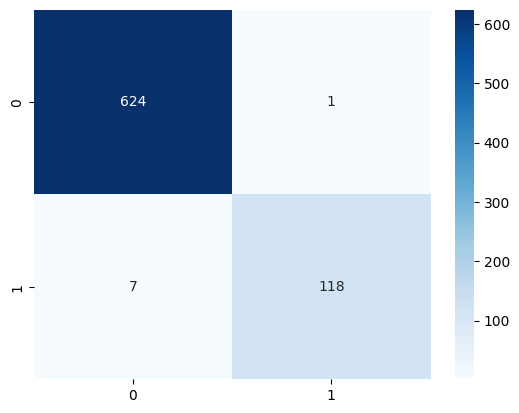

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm_ComplementNB = confusion_matrix(y_test, y_test_pred_ComplementNB)
sns.heatmap(cm_ComplementNB, annot=True, fmt='', cmap='Blues')
print(classification_report(y_test, y_test_pred_ComplementNB))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       625
           1       0.99      0.94      0.96       125

    accuracy                           0.99       750
   macro avg       0.99      0.97      0.98       750
weighted avg       0.99      0.99      0.99       750



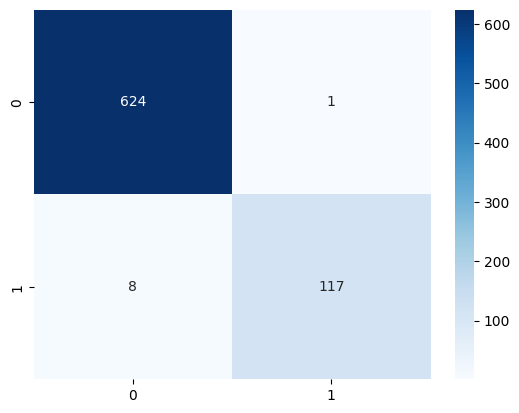

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm_MultinomialNB = confusion_matrix(y_test, y_test_pred_MultinomialNB)
sns.heatmap(cm_MultinomialNB, annot=True, fmt='', cmap='Blues')
print(classification_report(y_test, y_test_pred_MultinomialNB))

Нарисуйте ROC-кривую:

In [42]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_ComplementNB)
auc = metrics.roc_auc_score(y_test, y_test_pred_ComplementNB)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

NameError: name 'plt' is not defined

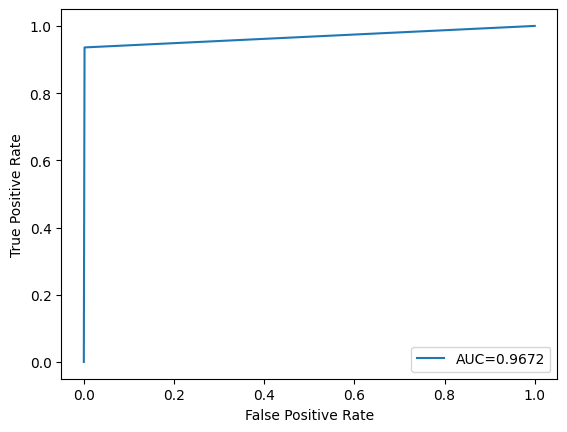

In [435]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_MultinomialNB)
auc = metrics.roc_auc_score(y_test, y_test_pred_MultinomialNB)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

Наилучшие значения параметров (ComplementNB): {'alpha': 0.04}
F1-score на тестовой выборке (ComplementNB) 0.9838709677419355


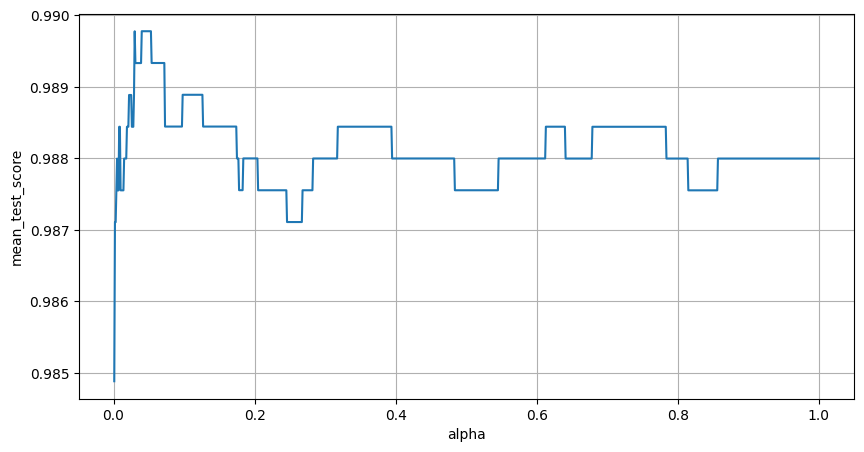

In [436]:
#ваш код здесь
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': list(np.linspace(0.001, 1, 1000, dtype=float)) }

grid_search = GridSearchCV(
    estimator=ComplementNB(),
    param_grid=param_grid,
    cv=5,
    n_jobs = -1
)
grid_search.fit(X_train, y_train)
print("Наилучшие значения параметров (ComplementNB): {}".format(grid_search.best_params_))

y_test_pred = grid_search.predict(X_test)
y_test_pred_proba = grid_search.predict_proba(X_test)
print('F1-score на тестовой выборке (ComplementNB)', metrics.f1_score(y_test, y_test_pred))

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=param_grid['alpha'], y=grid_search.cv_results_['mean_test_score'])
ax.set_xlabel('alpha')
ax.set_ylabel('mean_test_score')
ax.grid()

Наилучшие значения параметров (MultinomialNB): {'alpha': 0.041}
F1-score на тестовой выборке (MultinomialNB) 0.979757085020243


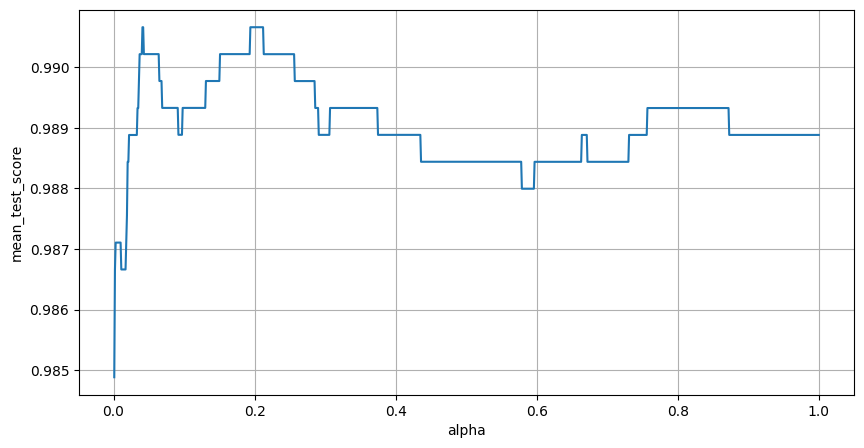

In [437]:
grid_search = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=param_grid,
    cv=5,
    n_jobs = -1
)
grid_search.fit(X_train, y_train)
print("Наилучшие значения параметров (MultinomialNB): {}".format(grid_search.best_params_))

y_test_pred = grid_search.predict(X_test)
y_test_pred_proba = grid_search.predict_proba(X_test)
print('F1-score на тестовой выборке (MultinomialNB)', metrics.f1_score(y_test, y_test_pred))

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=param_grid['alpha'], y=grid_search.cv_results_['mean_test_score'])
ax.set_xlabel('alpha')
ax.set_ylabel('mean_test_score')
ax.grid()